In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
from plot_utils import cool_savefig

In [3]:
small_batches = np.zeros((2,1500*500))

In [4]:
medium_batches = np.zeros((2,30*500))

In [5]:
large_batches = np.zeros((2,500))

In [6]:
from glob import glob

filenames = sorted(list(glob('concentration_estimates/*.npz')))
len(filenames)

500

In [7]:
for sim_num in range(500):
    npzfile = np.load(filenames[sim_num])
    
    small_batches[:,sim_num*1500:(sim_num+1)*1500] = npzfile['small_batches']
    medium_batches[:,sim_num*30:(sim_num+1)*30] = npzfile['medium_batches']
    large_batches[:,sim_num] = npzfile['whole_sim']

In [8]:
small_batches_densities = small_batches[0,:]
small_batches_compositions = small_batches[1,:]

medium_batches_densities = medium_batches[0,:]
medium_batches_compositions = medium_batches[1,:]

large_batches_densities = large_batches[0,:]
large_batches_compositions = large_batches[1,:]

In [9]:
print(np.mean(small_batches_densities < np.inf))
print(np.mean(small_batches_compositions < np.inf))

print(np.mean(medium_batches_densities < np.inf))
print(np.mean(medium_batches_compositions < np.inf))

print(np.mean(large_batches_densities < np.inf))
print(np.mean(large_batches_compositions < np.inf))

1.0
1.0
1.0
1.0
1.0
1.0


In [10]:
def small_part(array, x): return array[array < x]
def finite_part(array): return small_part(array, np.inf)

In [11]:
def x_fmt(x, pos):
    return '$10^{}$'.format(x).replace('.0','').replace('.5', '')

In [12]:
def crest(index):
    return sns.color_palette("crest")[index]

def magma(index):
    return sns.color_palette("magma")[index]

# Density Heterogeneity

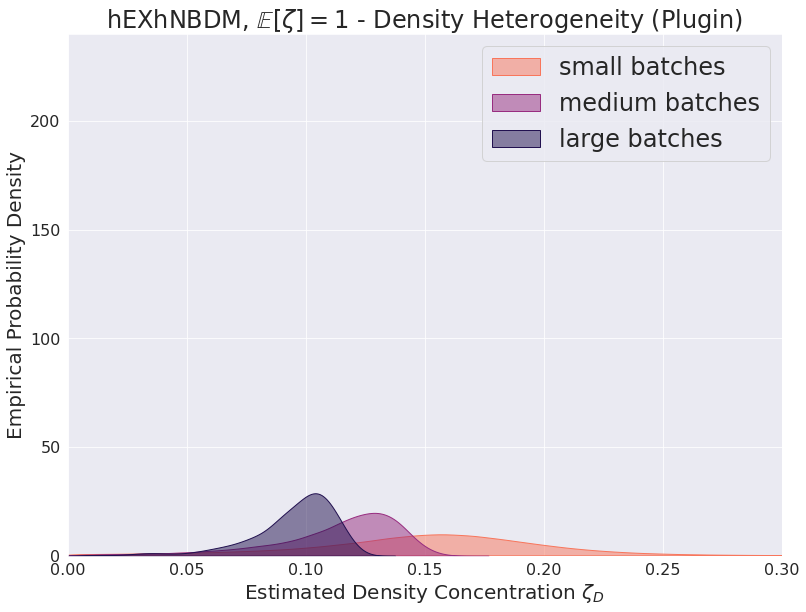

In [13]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(12.8, 9.6))
    axis = sns.kdeplot(finite_part(small_batches_densities), fill=True, color=magma(4), alpha=0.5)
    sns.kdeplot(finite_part(medium_batches_densities), ax=axis, fill=True, color=magma(2), alpha=0.5)
    sns.kdeplot(finite_part(large_batches_densities),ax=axis, fill=True, color=magma(0), alpha=0.5)
    axis.legend(labels=["small batches", "medium batches", "large batches"], fontsize=24)
    axis.set_ylabel('Empirical Probability Density', fontsize=20)
    axis.set_xlabel('Estimated Density Concentration $\zeta_D$', fontsize=20)
    axis.set_xlim((0,0.3))
    axis.set_ylim((0,240))
    axis.tick_params(labelsize=16)
    title = 'hEXhNBDM, $\mathbb{E}[\zeta]=1$ - Density Heterogeneity (Plugin)'
    plt.title(title, fontsize=24)
    cool_savefig(title)

# Compositional Heterogeneity

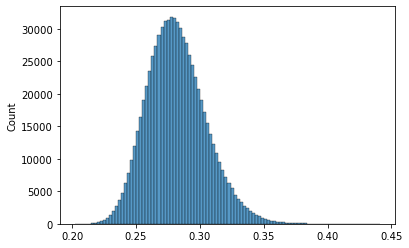

In [14]:
axis = sns.histplot(small_part(small_batches_compositions,3), bins=100)


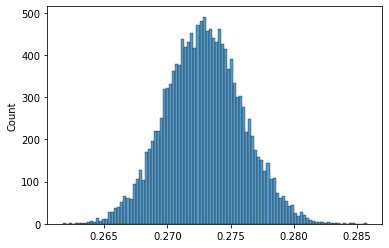

In [15]:
axis = sns.histplot(medium_batches_compositions, bins=100)

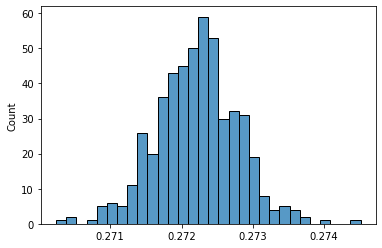

In [16]:
axis = sns.histplot(large_batches_compositions, bins=30)

<AxesSubplot:ylabel='Density'>

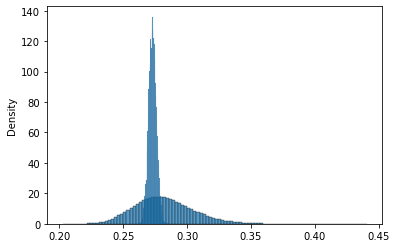

In [17]:
axis = sns.histplot(small_part(small_batches_compositions,3), bins=100, stat="density")
sns.histplot(medium_batches_compositions, bins=100, ax=axis, stat="density")

<AxesSubplot:ylabel='Density'>

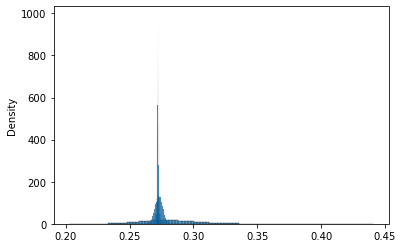

In [18]:
axis = sns.histplot(small_part(small_batches_compositions,3), bins=100, stat="density")
sns.histplot(medium_batches_compositions, bins=100, ax=axis, stat="density")
sns.histplot(large_batches_compositions, bins=100, ax=axis, stat="density")

<AxesSubplot:ylabel='Density'>

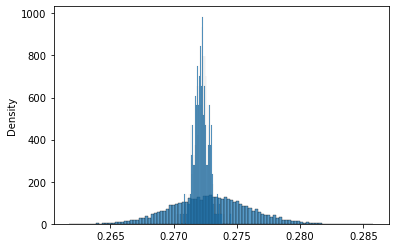

In [19]:
axis = sns.histplot(medium_batches_compositions, bins=100, stat="density")
sns.histplot(large_batches_compositions, bins=100, ax=axis, stat="density")

OK so the effective compositional $\zeta$ vis a vis compositional heterogeneity is not the same as that for CECPDM, and even slightly larger $\approx 0.27 > 0.24$. That HEHNBDM is even more divergent though then appears to be explained by its effective density $\zeta$ which is _really_ small, $0.1-0.12$, which I did not expect, but again both of these estimates qualitatively fit the data really well, and also it is interesting that even when their $\zeta$'s are sampled from the same distribution, the effective compositional and density zeta's don't have to be the same unless that "distribution" is Dirac or whatever.

again it would be interesting to compare the $\chi^2$ divergences of this with a gHNB-DM distribution with actual parameters set to (approximately) these effective values. but that would be an even more annoying/difficult thing to compute expected counts for. yeah hypothetically I could get approximate expected counts via Monte Carlo simulation but no I am not doing anymore monte carlo simulations I am sick and tired of them

but aanyway I am glad we did these exponential prior things -- they proved to be quite interesting

also this is probably the nail in the coffin for any notion I ever had of not discussing the density and compositional concentration parameters as if they were separate when both are finite (it's implicit in hPoDM where the density concentration is infinite while the compositional concentration is finite, but anyway...)

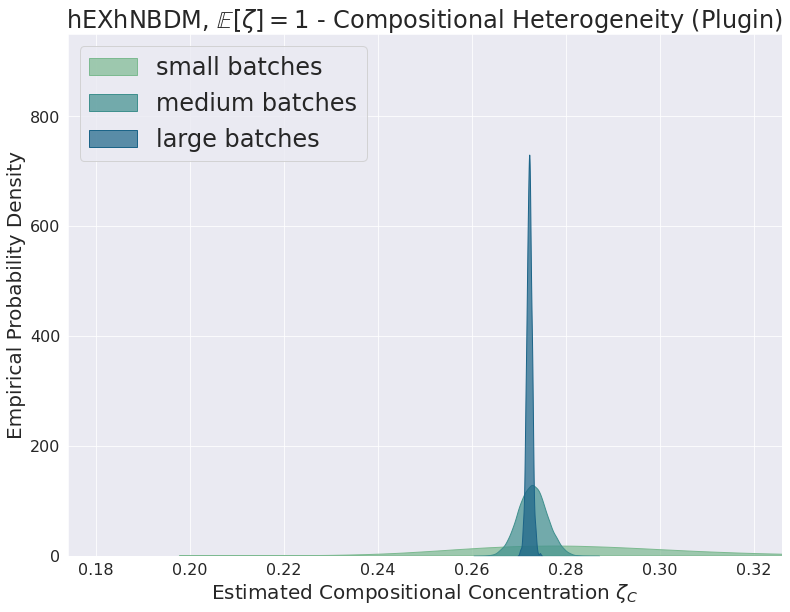

In [20]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(12.8, 9.6))
    axis = sns.kdeplot(finite_part(small_batches_compositions), color=crest(0), fill=True, alpha=0.7)
    sns.kdeplot(finite_part(medium_batches_compositions),  ax=axis, color=crest(2), fill=True, alpha=0.7)
    sns.kdeplot(finite_part(large_batches_compositions),  ax=axis, color=crest(4), fill=True, alpha=0.7)
    axis.legend(labels=["small batches", "medium batches", "large batches"], 
                fontsize=24, loc="upper left")
    axis.set_ylabel('Empirical Probability Density', fontsize=20)
    axis.set_xlabel('Estimated Compositional Concentration $\zeta_C$ ', fontsize=20)
    axis.tick_params(labelsize=16)
    axis.set_xlim((0.174,0.326))
    axis.set_ylim((0,950))
    title = 'hEXhNBDM, $\mathbb{E}[\zeta]=1$ - Compositional Heterogeneity (Plugin)'
    plt.title(title, fontsize=24)
    cool_savefig(title)

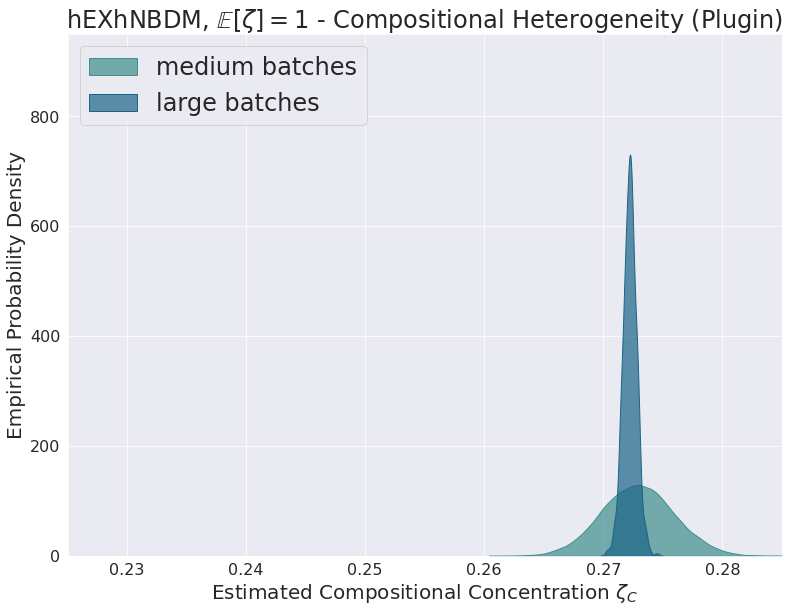

In [21]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(12.8, 9.6))
    axis = sns.kdeplot(finite_part(medium_batches_compositions),  color=crest(2), fill=True, alpha=0.7)
    sns.kdeplot(finite_part(large_batches_compositions),  ax=axis, color=crest(4), fill=True, alpha=0.7)
    axis.legend(labels=["medium batches", "large batches"], fontsize=24, loc="upper left")
    axis.set_ylabel('Empirical Probability Density', fontsize=20)
    axis.set_xlabel('Estimated Compositional Concentration $\zeta_C$ ', fontsize=20)
    axis.tick_params(labelsize=16)
    axis.set_xlim((0.225,0.285))
    axis.set_ylim((0,950))
    title = 'hEXhNBDM, $\mathbb{E}[\zeta]=1$ - Compositional Heterogeneity (Plugin)'
    plt.title(title, fontsize=24)
    cool_savefig(title + ' zoom')